In [1]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
single_image = x_train[0]

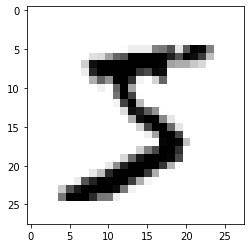

In [13]:
plt.imshow(single_image, cmap='gray_r') 

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train.shape

(60000,)

In [20]:
# converting y_train and y_test into one hot encoding
from keras.utils.np_utils import to_categorical

In [21]:
y_cat_test = to_categorical(y_test, 10) # 10 classes (numbers from 0 to 9)
y_cat_train = to_categorical(y_train, 10)

In [22]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
y_cat_train[0] # 5th index is 1

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
single_image.max()

255

In [25]:
# Feature scaling / normalization
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [26]:
scaled_image = x_train[0]

In [28]:
scaled_image.max()

1.0

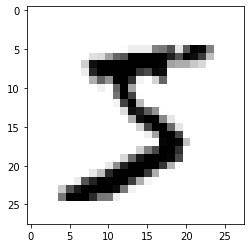

In [29]:
plt.imshow(scaled_image, cmap='gray_r') 

In [30]:
x_train.shape # there is no color channel

(60000, 28, 28)

In [31]:
# reshaping data (adding color channels)
x_train = x_train.reshape(60000,28,28,1) # 1 means there is a color channel

In [32]:
x_test = x_test.reshape(10000,28,28,1)

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# transforming form 2D to 1D
model.add(Flatten())

# Dense layer (128,256,512)
model.add(Dense(128, activation='relu'))

# output
model.add(Dense(10, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Training model
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1402 - accuracy: 0.9577 - ETA
Epoch 2/2
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0494 - accuracy: 0.9852


In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
# performance evaluation on test sets
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0383 - accuracy: 0.9875


[0.038287483155727386, 0.987500011920929]

In [43]:
from sklearn.metrics import classification_report

In [44]:
# predicting the test set results
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

